In [1]:
import matplotlib as mpl
import eulerian_function as ef
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, inset_axes
mpl.rcParams['figure.dpi'] = 150
# %matplotlib widget

In [2]:
tpoints = ef.tpoints
regions = ef.regions
tpoints_true = ef.true_tpoints(tpoints)
regions_true = ef.true_regions(regions)

In [3]:
for region, coords in list(regions_true.items())[:5]:
    print(coords)

[array([312.890625]), array([318.515625]), array([47.62598359]), array([51.82824186])]
[array([231.328125]), array([236.953125]), array([54.62973898]), array([58.83196742])]
[array([286.171875]), array([291.796875]), array([54.62973898]), array([58.83196742])]
[array([263.671875]), array([269.296875]), array([29.41609782]), array([33.61838862])]
[array([284.765625]), array([290.390625]), array([43.42371392]), array([47.62598359])]


## Regions map (Figure 7)

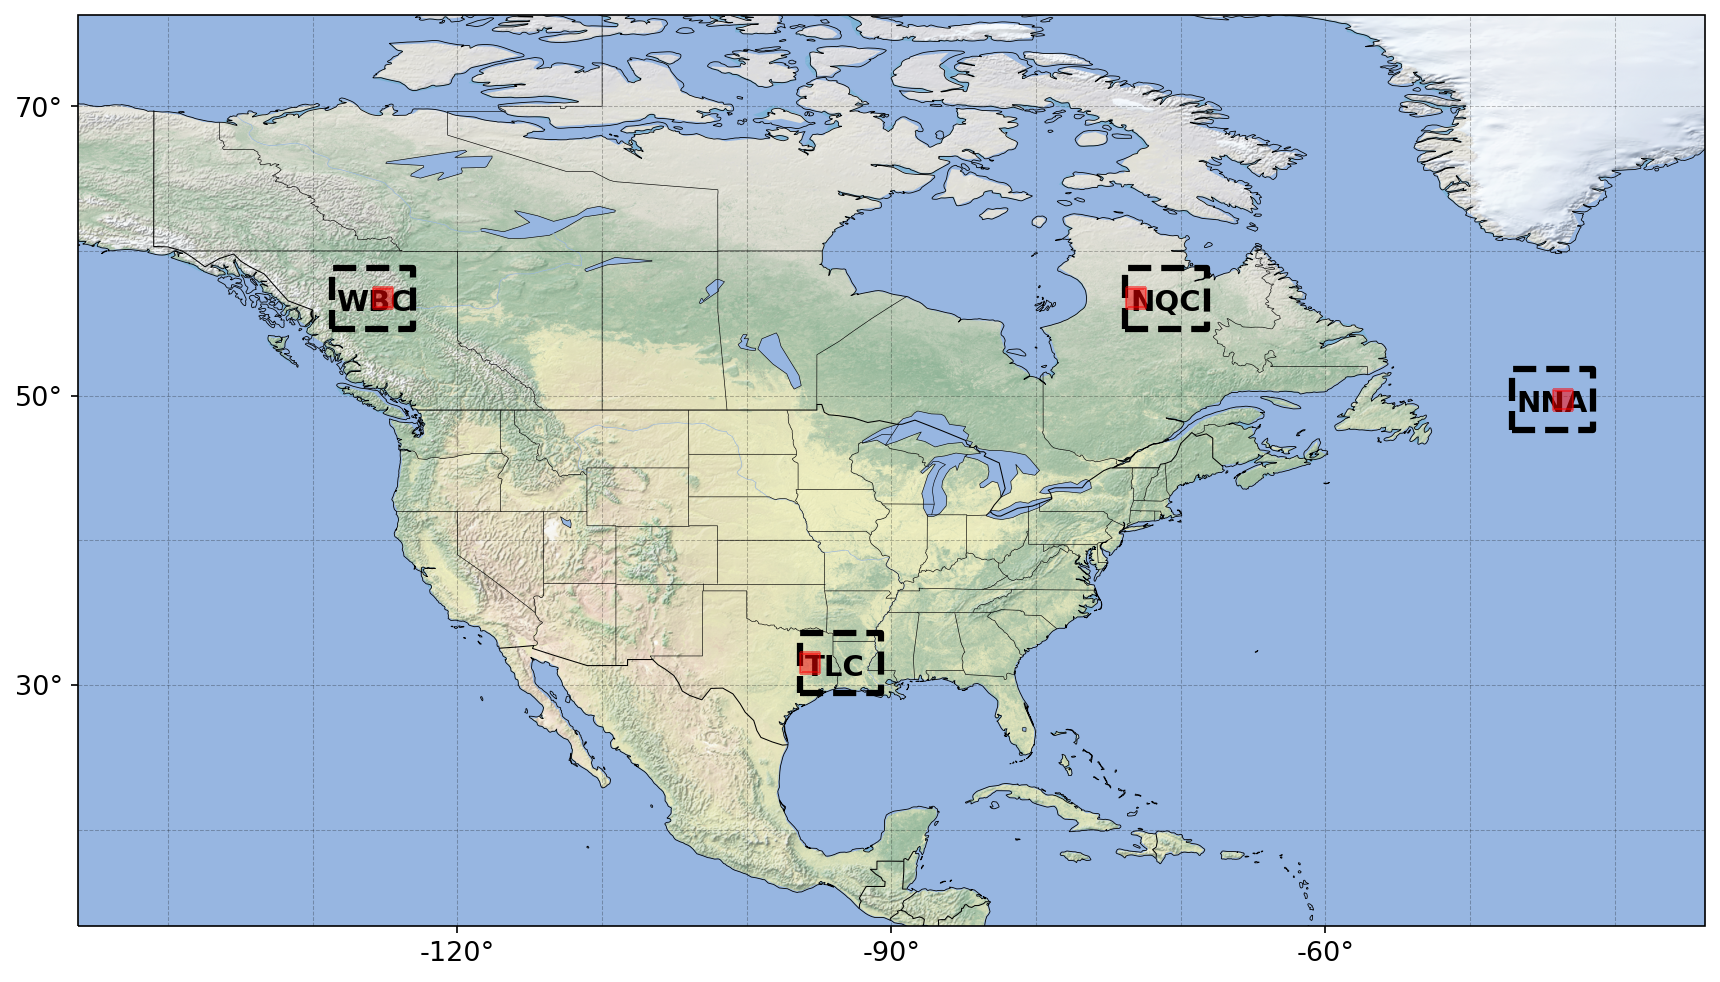

In [4]:
fig1 = plt.figure(figsize=(14,14))
plotcrs = ccrs.PlateCarree()
ax = plt.subplot(projection=plotcrs)

ax.add_feature(cartopy.feature.OCEAN, zorder=1)
ax.add_feature(cartopy.feature.LAKES, zorder=1, linewidth=0.3, edgecolor='black')
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5, edgecolor='black', zorder=2)
ax.add_feature(cartopy.feature.RIVERS, linewidth=0.3)
# ax.add_feature(cartopy.feature.LAND, zorder=0, linewidth=0.3, edgecolor='black')
states_provinces = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.3)
ax.coastlines(resolution='50m', linewidth=0.4, color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='k', alpha=0.25, xlocs=range(-180,180,10), ylocs=range(-90,90,10))
xticks = np.arange(-180, 180, 30)
yticks = np.arange(-90, 90, 20)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([f"{lon}°" for lon in xticks], fontsize=13)
ax.set_yticklabels([f"{lat}°" for lat in yticks], fontsize=13)
ax.set_extent([ef.lons.min(), ef.lons.max(), ef.lats.min(), ef.lats.max()], crs=ccrs.PlateCarree())
img = plt.imread('/home/demeyer/DATA/TOOLS/NE1_50M_SR_W.tif')
ax.imshow(img, origin='upper', extent=(-180, 180, -90, 90), transform=plotcrs)

region_names = ['NNA', 'WBC', 'NQC', 'TLC']
i=0
for region, coords in list(regions_true.items())[:4]:
    plt.plot([coords[0], coords[1], coords[1], coords[0], coords[0]], [coords[2], coords[2], coords[3], coords[3], coords[2]], linestyle='--', linewidth=3, color='black', transform=ccrs.PlateCarree())
    # ax.text((coords[0] + coords[1]-2)/2, (coords[2] + coords[3]-2)/2, ef.chiffre_en_lettre(i), transform=ccrs.PlateCarree(), fontsize=20, fontweight='bold')
    ax.text((coords[0] + coords[1]-5)/2, (coords[2] + coords[3]-1.7)/2, region_names[i], transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold')
    i+=1

for point, coords in list(tpoints_true.items())[:4]:
    plt.scatter(coords[0], coords[1], color='red', marker='s', s=90, alpha=0.5, zorder=4, transform=ccrs.PlateCarree())

## Initialisation for scatter plots

In [31]:
#Args
background='no'
cyclone='min'
remove=['CRCM6-GEM5-UAA-SN']
figure='False'

In [32]:
def mae_and_fit(region, save='True', background=background, cyclone=cyclone, remove=remove, figure=figure):

    models, _, ds_err, _, _, _ = ef.pre_process(background, cyclone, region, remove, figure)
    models.remove('ERA5')
    
    if type(region) == list:
        for key, value in regions.items():
            if value == region:
                add = background+'-background_'+cyclone+'-cyclone_'+key

    else:
        add = background+'-background_'+cyclone+'-cyclone_'+region+'-region'
    
    for met in ef.parameters[0:3]:
        fig_name = ef.path_out+'scatter_error_'+met+'_'+add+'.png'

        fig, ax = plt.subplots()
        x = ds_err.psl.sel(parameters=met)
        y = ds_err.huss.sel(parameters=met)

        z = abs(x*y)
        plt.scatter(x, y, c=z, cmap='autumn_r', marker='o', s=100)
        clb=plt.colorbar()
        clb.set_label(ef.name_parq[met]+'$\cdot$'+ef.name_parp[met])

        for imod, mod in enumerate(models):
            plt.text(x.sel(models=mod), y.sel(models=mod), imod+1, fontsize=8)
            plt.scatter(x.sel(models=mod), y.sel(models=mod), c='k', marker='o', s=10)

        plt.xlabel(ef.name_parp[met]+' (hPa)')
        plt.ylabel(ef.name_parq[met]+' ($g.kg^{-1}$)')
        if save != 'False': plt.savefig(fig_name, bbox_inches='tight', dpi=300)

In [33]:
def aae_and_bias(region, save='True', background=background, cyclone=cyclone, remove=remove, figure=figure):

    models, _, ds_err, _, _, _ = ef.pre_process(background, cyclone, region, remove, figure)
    models.remove('ERA5')
    
    if type(region) == list:
        for key, value in regions.items():
            if value == region:
                add = background+'-background_'+cyclone+'-cyclone_'+key

    else:
        add = background+'-background_'+cyclone+'-cyclone_'+region+'-region'
    
    for met in ef.parameters[3:7]:
        fig_name = ef.path_out+'scatter_error_'+met+'_'+add+'.png'

        fig, ax = plt.subplots()
        x = ds_err.psl.sel(parameters=met)
        y = ds_err.huss.sel(parameters=met)
        z = abs(x*y)
        plt.scatter(x, y, c=z, cmap='autumn_r', marker='o', s=100)
        clb=plt.colorbar()
        clb.set_label(ef.name_parq[met]+'$\cdot$'+ef.name_parp[met])

        for imod, mod in enumerate(models):
            plt.text(x.sel(models=mod), y.sel(models=mod), imod+1, fontsize=8)
            plt.scatter(x.sel(models=mod), y.sel(models=mod), c='k', marker='o', s=10)

        plt.xlabel(ef.name_parp[met]+' (hPa)')
        plt.ylabel(ef.name_parq[met]+' ($g.kg^{-1}$)')
        if save != 'False': plt.savefig(fig_name, bbox_inches='tight', dpi=300)

In [34]:
def bias(region, xlim, ylim, save='True', background=background, cyclone=cyclone, remove=remove, figure=figure):

    models, ds_bias, _, ds_era, _, _ = ef.pre_process(background, cyclone, region, remove, figure)
    models.remove('ERA5')
    
    if type(region) == list:
        for key, value in regions.items():
            if value == region:
                add = background+'-background_'+cyclone+'-cyclone_'+key

    else:
        add = background+'-background_'+cyclone+'-cyclone_'+region+'-region'
    
    for met in ef.parameters[7:]:
        fig_name = ef.path_out+'scatter_error_'+met+'_'+add+'.png'

        fig, ax = plt.subplots(figsize=(5, 4))
        x = ds_bias.psl.sel(parameters=met)
        x_era = ds_era.psl.sel(parameters=met)
        y = ds_bias.huss.sel(parameters=met)
        y_era = ds_era.huss.sel(parameters=met)
        ax.set_xlim(-xlim, xlim)
        ax.set_ylim(-ylim, ylim)
        ax.axhline(0, color='black', linewidth=0.8, alpha=1, zorder=0)
        ax.axvline(0, color='black', linewidth=0.8, alpha=1, zorder=0)

        if met in ['asymm','slope']:
            offset=36
        else:
            offset=1

        plt.scatter(x*offset, y*offset, c='grey', alpha=0.5, marker='o', s=100)

        text_to_display = (f"ERA5: {np.round(x_era.mean().values*offset,2)} hPa ; {np.round(y_era.mean().values*offset,2)} g.kg$^{-1}$"
                           f"\nEns bias: {np.round(x.mean().values*offset,2)}±{np.round(x.std().values*offset,2)} hPa ; {np.round(y.mean().values*offset,2)}±{np.round(y.std().values*offset,2)} g.kg$^{-1}$")
        
        if met == 'min' and region == regions['n_atlantic']:
            ax.text(0.02, 0.975, text_to_display, bbox = dict(facecolor = 'white', alpha = 0.9), horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=6.2)
        else:
            ax.text(0.981, 0.024, text_to_display, bbox = dict(facecolor = 'white', alpha = 0.9), horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=6.2)
        
        for imod, mod in enumerate(models):
            plt.text(x.sel(models=mod)*offset, y.sel(models=mod)*offset, imod+1, fontsize=8)
            plt.scatter(x.sel(models=mod)*offset, y.sel(models=mod)*offset, c='k', marker='o', s=10)

        plt.xlabel(ef.name_parp[met]+' (hPa)')
        plt.ylabel(ef.name_parq[met]+' ($g.kg^{-1}$)')
        if save != 'False': plt.savefig(fig_name, bbox_inches='tight', dpi=300)

In [35]:
def bias_monovariable(region, plim, qlim, save='True', background=background, cyclone=cyclone, remove=remove, figure=figure):

    models, ds_bias, _, ds_era, _, _ = ef.pre_process(background, cyclone, region, remove, figure)
    models.remove('ERA5')
    
    if type(region) == list:
        for key, value in regions.items():
            if value == region:
                add = background+'-background_'+cyclone+'-cyclone_'+key

    else:
        add = background+'-background_'+cyclone+'-cyclone_'+region+'-region'
    
    for variable in ef.variables:
        
        if variable == 'psl':
            lim = plim
        else:
            lim = qlim

        fig_name = ef.path_out+'scatter_error_'+variable+'_'+add+'.png'

        fig, ax = plt.subplots(figsize=(5, 4))
        x = ds_bias[variable].sel(parameters='min')
        x_era = ds_era[variable].sel(parameters='min')
        y = ds_bias[variable].sel(parameters='slope')
        y_era = ds_era[variable].sel(parameters='slope')
        z = ds_bias[variable].sel(parameters='asymm')
        z_era = ds_era[variable].sel(parameters='asymm')  
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.axhline(0, color='black', linewidth=0.8, alpha=1, zorder=0)
        ax.axvline(0, color='black', linewidth=0.8, alpha=1, zorder=0)

        cmap = plt.get_cmap('coolwarm')
        bin = (lim*2)/20.
        n_levs = 1+np.ceil((lim*2)/bin)
        bounds = -lim+np.arange(n_levs)*bin
        norm = BoundaryNorm(bounds, cmap.N)

        colors = [
                (0, 'blue'),  # Bleu foncé
                (0.35, '#5677E1'),  # Bleu plus clair
                (0.5, '#cfcdca'),  # Blanc
                (0.65, '#E15858'),  # Rouge plus clair
                (1, 'red')  # Rouge foncé
            ]
        cmap = LinearSegmentedColormap.from_list('custom_coolwarm', colors, N=256)

        scatter = plt.scatter(x, y*36, c=z*36, alpha=0.9, cmap=cmap, marker='o', s=100, norm=norm)
        clb = plt.colorbar(scatter, boundaries=bounds)

        if variable == 'psl':
            table_data = [
                ["", ef.name_parp['min'], ef.name_parp['slope'], ef.name_parp['asymm']],
                ["ERA5", f"{np.round(x_era.mean().values, 2)}", f"{np.round(y_era.mean().values*36, 2)}", f"{np.round(z_era.mean().values*36, 2)}"],
                ["Model bias", f"{np.round(x.mean().values,2)}±{np.round(x.std().values,2)}", f"{np.round(y.mean().values*36,2)}±{np.round(y.std().values*36,2)}", f"{np.round(z.mean().values*36,2)}±{np.round(z.std().values*36,2)}"]
            ]
        else:
            table_data = [
                ["", ef.name_parq['min'], ef.name_parq['slope'], ef.name_parq['asymm']],
                ["ERA5", f"{np.round(x_era.mean().values, 2)}", f"{np.round(y_era.mean().values*36, 2)}", f"{np.round(z_era.mean().values*36, 2)}"],
                ["Model bias", f"{np.round(x.mean().values,2)}±{np.round(x.std().values,2)}", f"{np.round(y.mean().values*36,2)}±{np.round(y.std().values*36,2)}", f"{np.round(z.mean().values*36,2)}±{np.round(z.std().values*36,2)}"]
            ]
            
        # table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='upper right', bbox=[0.5, 0.9, 0.5, 0.1])
        table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='bottom', bbox=[0, -0.4, 1, 0.17])
        
        for key, cell in table.get_celld().items():
            cell.set_linewidth(0.75)
            cell.set_fontsize(8)
            if key == (0, 0):
                cell.set_edgecolor('none')          

        for imod, mod in enumerate(models):
            plt.text(x.sel(models=mod), y.sel(models=mod)*36, imod+1, fontsize=8)
            plt.scatter(x.sel(models=mod), y.sel(models=mod)*36, c='k', marker='o', s=10)

        if variable == 'psl':
            plt.xlabel(ef.name_parp['min']+' (hPa)')
            plt.ylabel(ef.name_parp['slope']+' (hPa)')
            clb.set_label(ef.name_parp['asymm']+' (hPa)')
        else:
            plt.xlabel(ef.name_parq['min']+' ($g.kg^{-1}$)')
            plt.ylabel(ef.name_parq['slope']+' ($g.kg^{-1}$)')
            clb.set_label(ef.name_parq['asymm']+' ($g.kg^{-1}$)')

        if save != 'False': plt.savefig(fig_name, bbox_inches='tight', dpi=300)

## The whole North American domain (Figure 6)

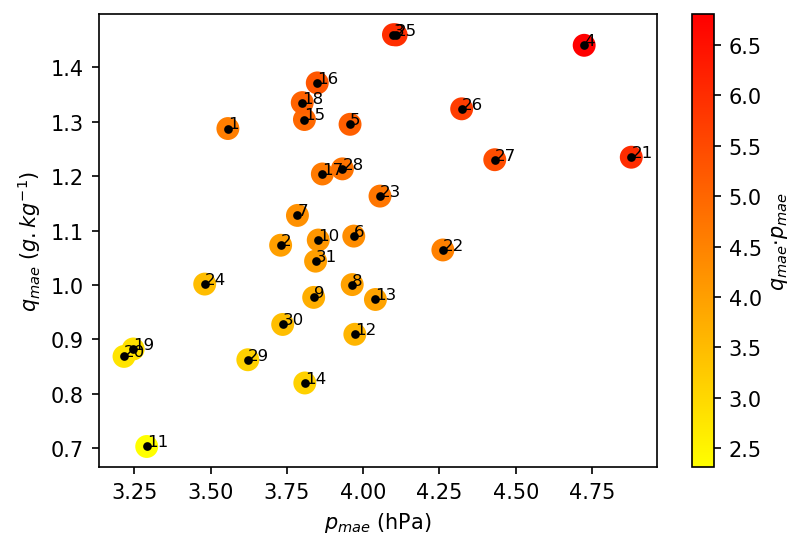

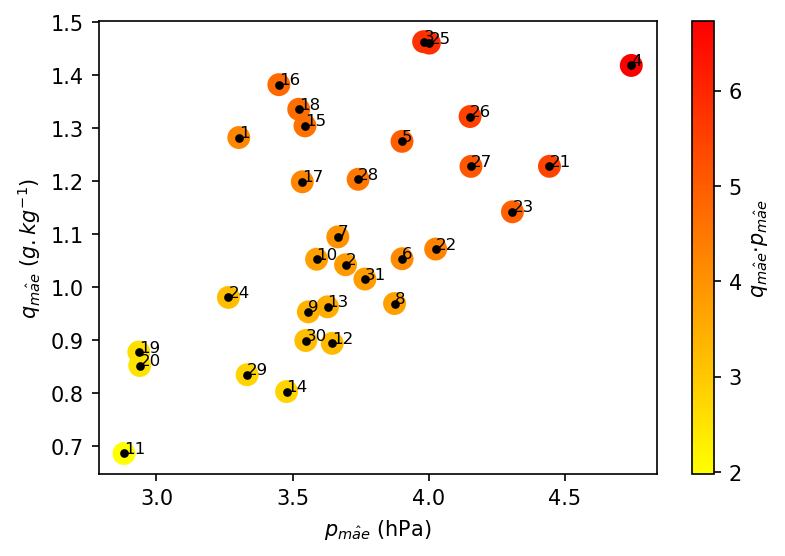

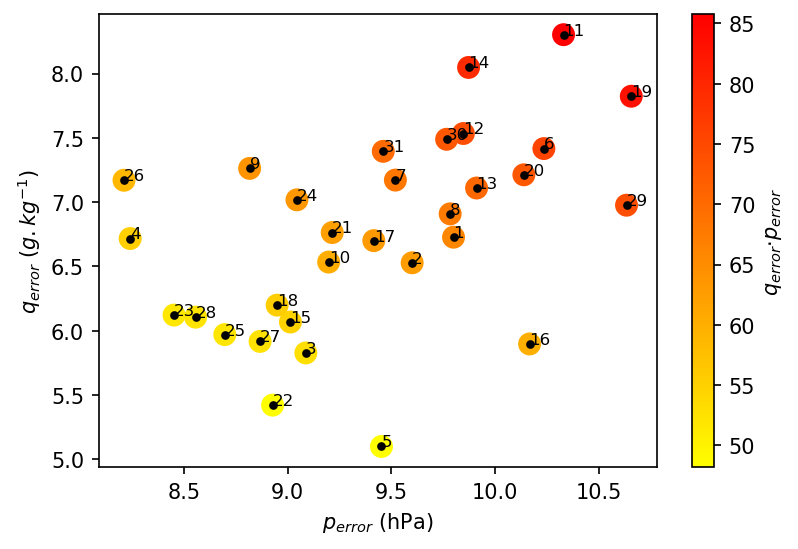

In [36]:
mae_and_fit(region='All', save='False')

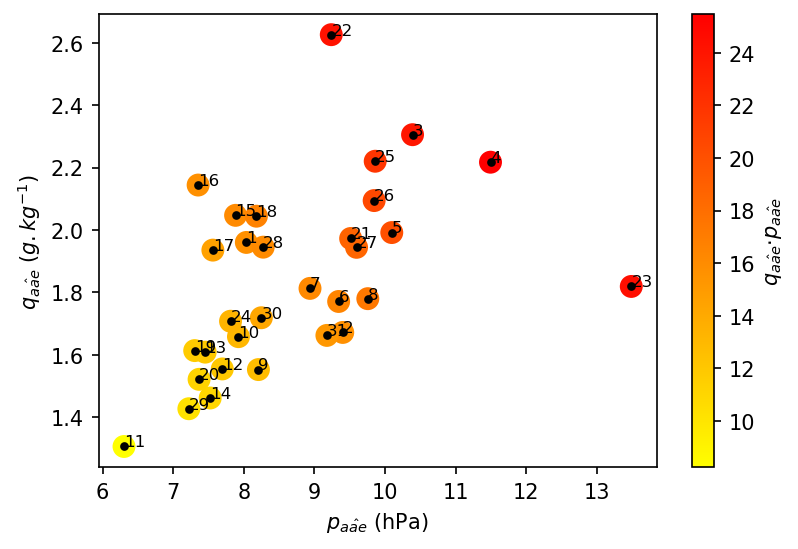

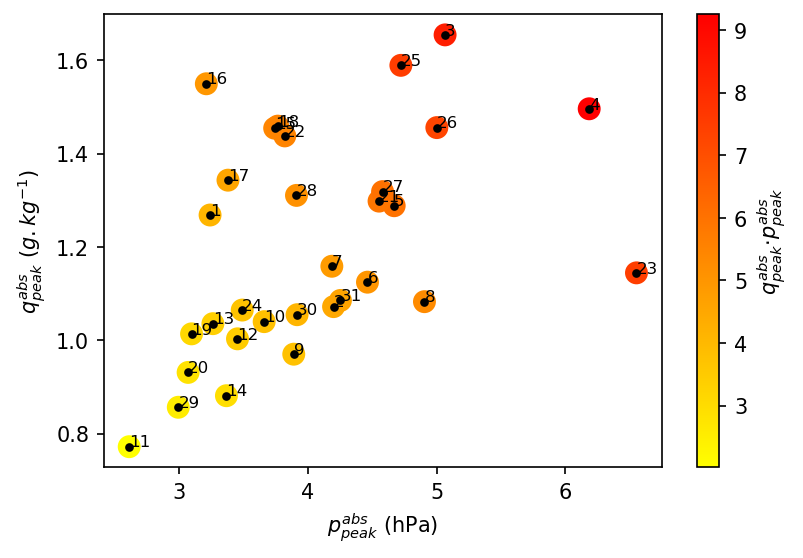

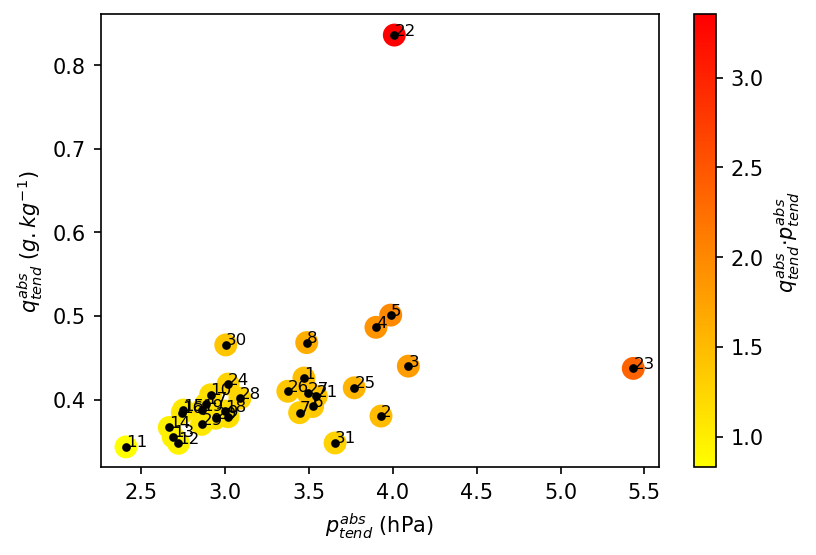

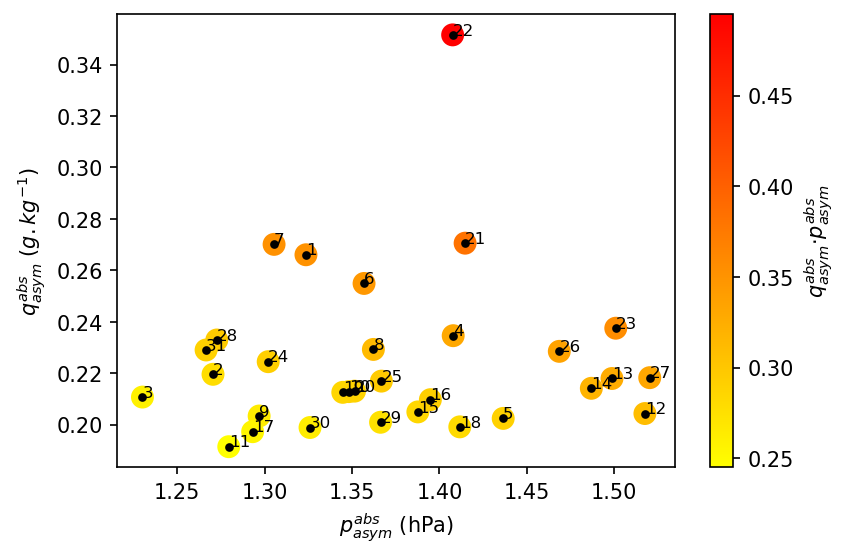

In [37]:
aae_and_bias(region='All', save='False')

## North Atlantic region (Figure 8)

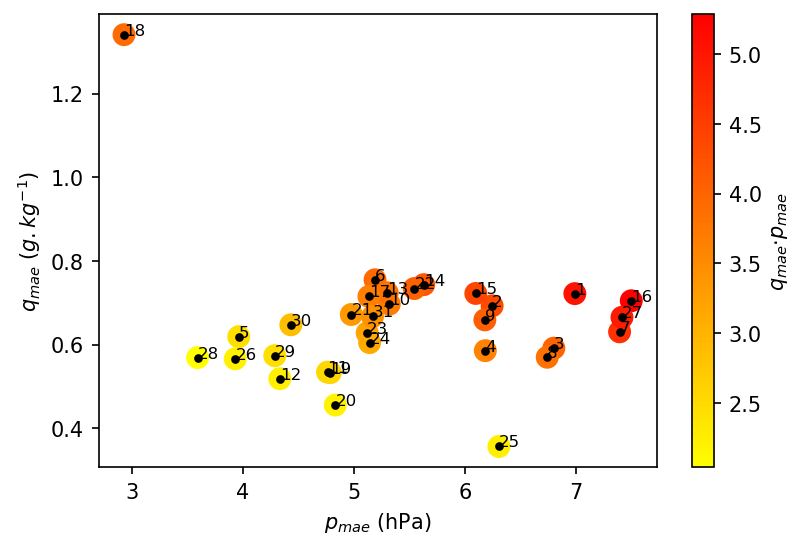

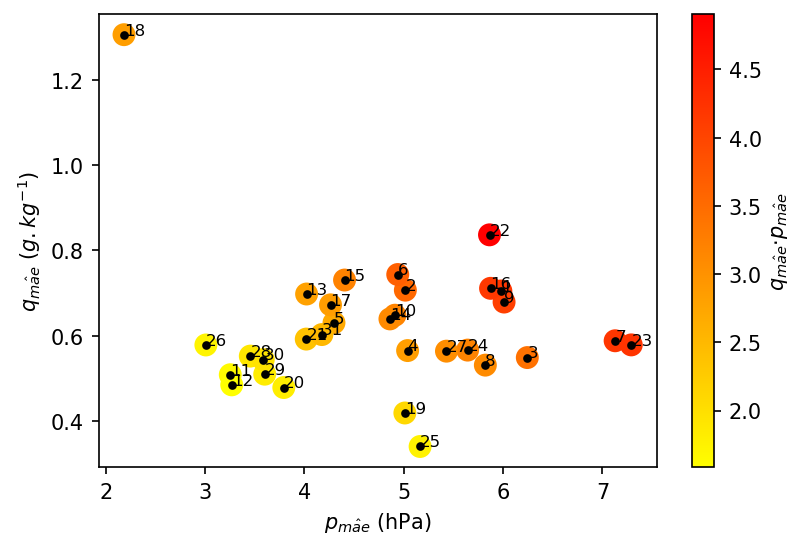

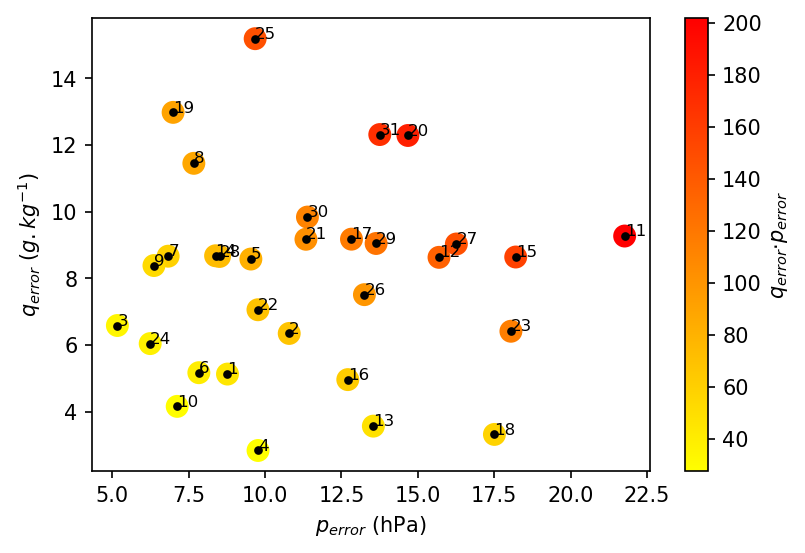

In [38]:
mae_and_fit(region=regions['n_atlantic'], save='False')

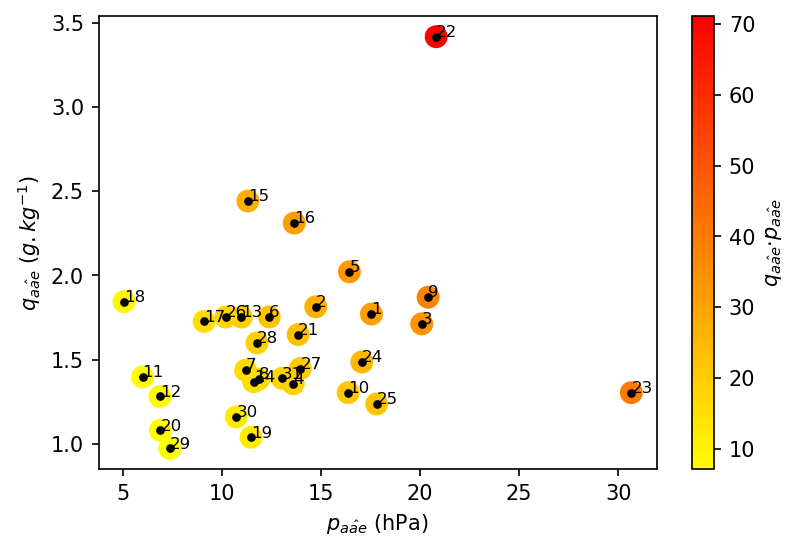

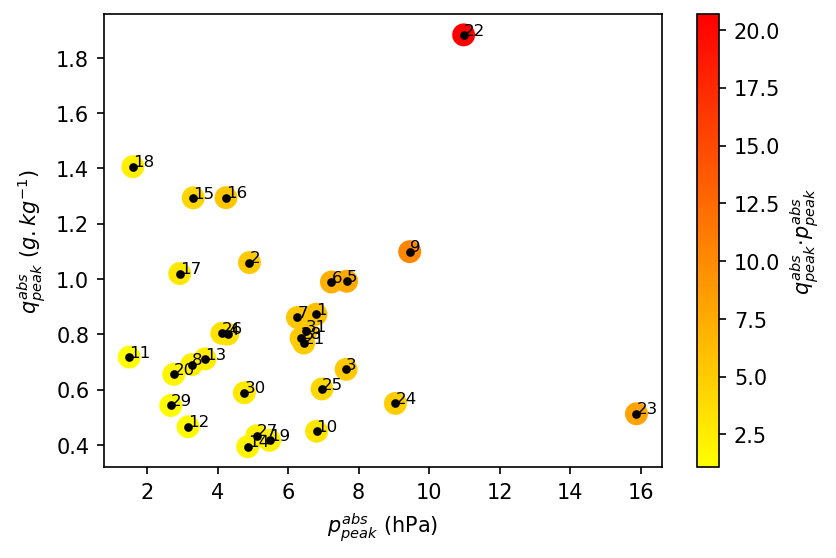

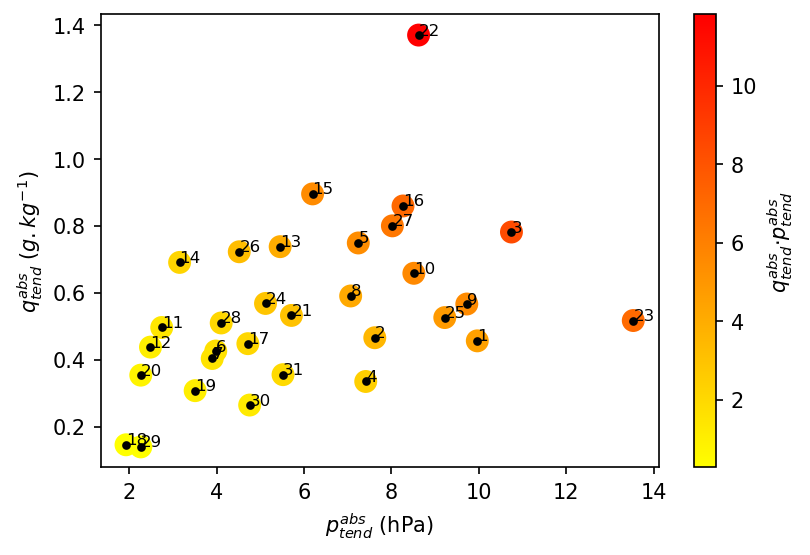

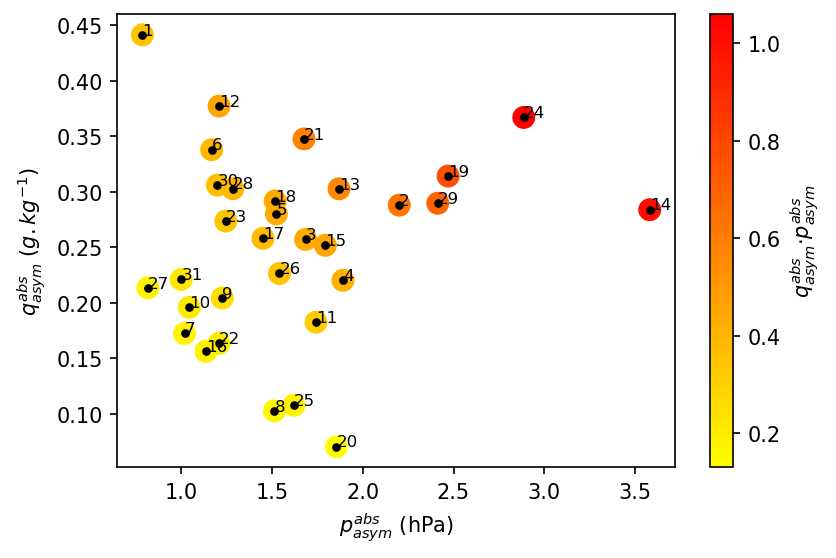

In [39]:
aae_and_bias(region=regions['n_atlantic'], save='False')

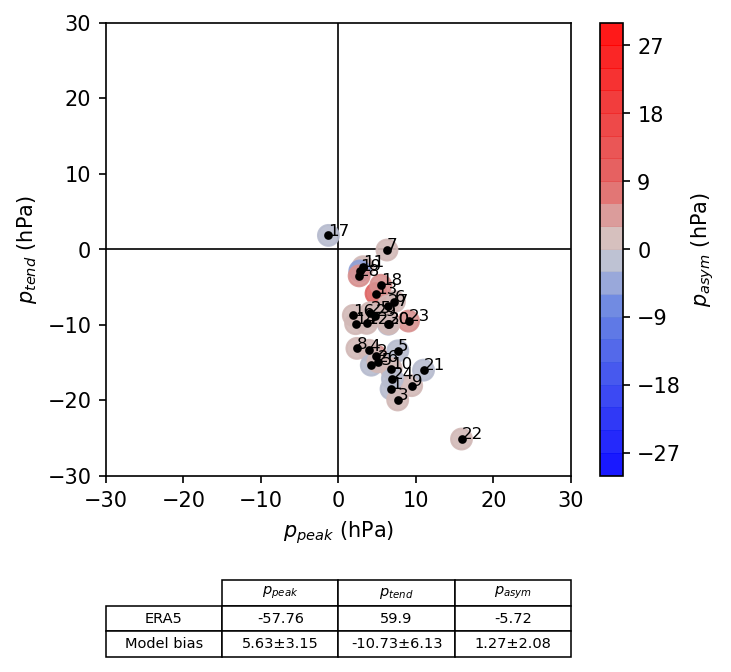

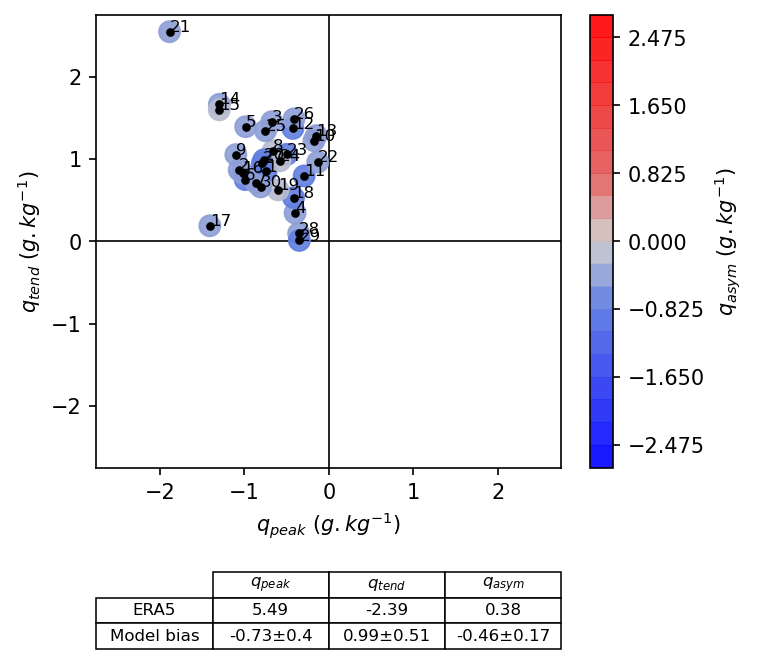

In [40]:
bias_monovariable(regions['n_atlantic'], plim=30, qlim=2.75, remove=['CRCM6-GEM5-UAA-SN', 'CRCM6-GEM5-UAA'])

## Western Canadian domain (Figure 10)

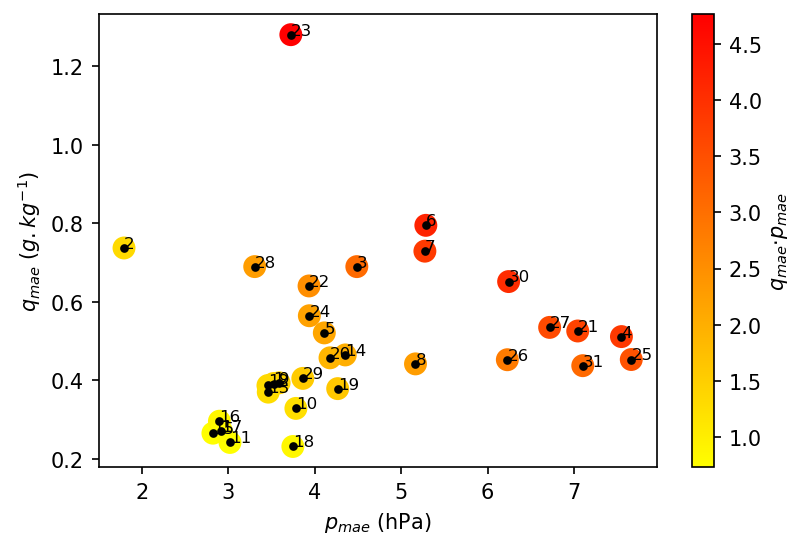

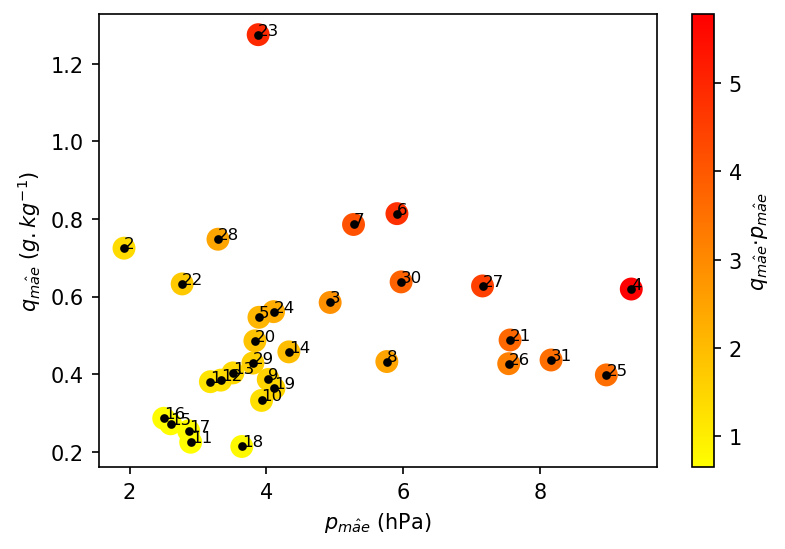

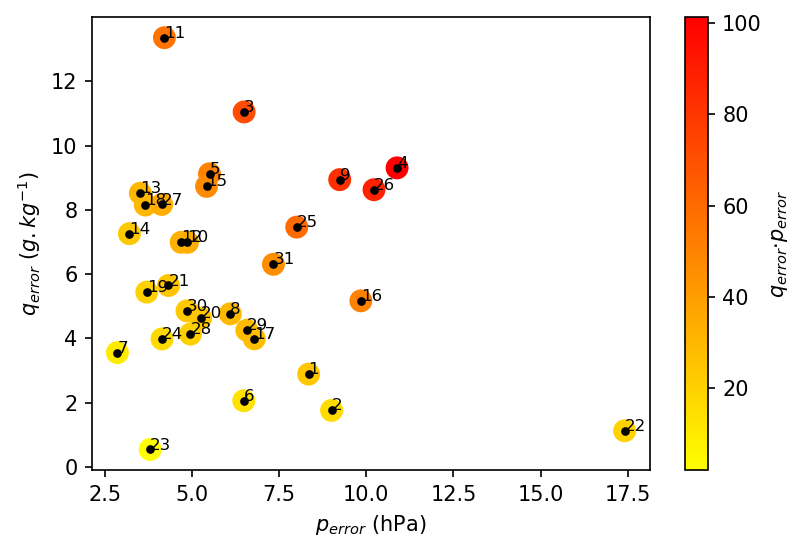

In [41]:
mae_and_fit(region=regions['w_canada'], save='False')

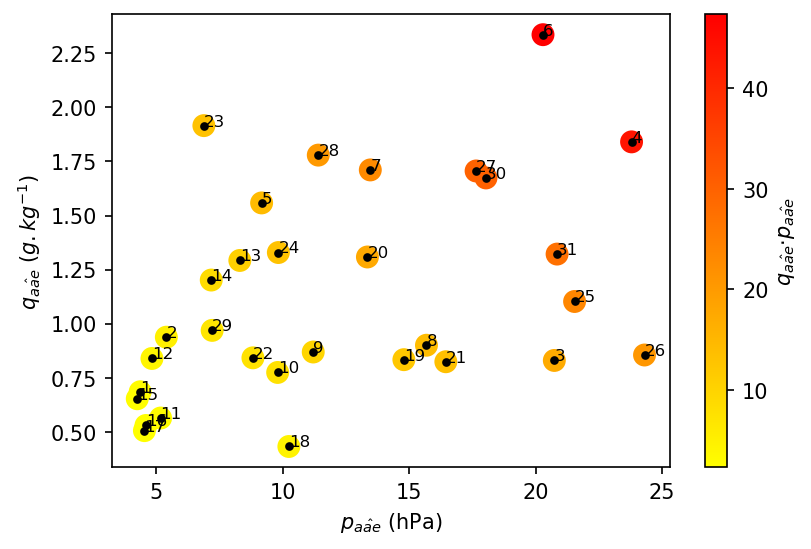

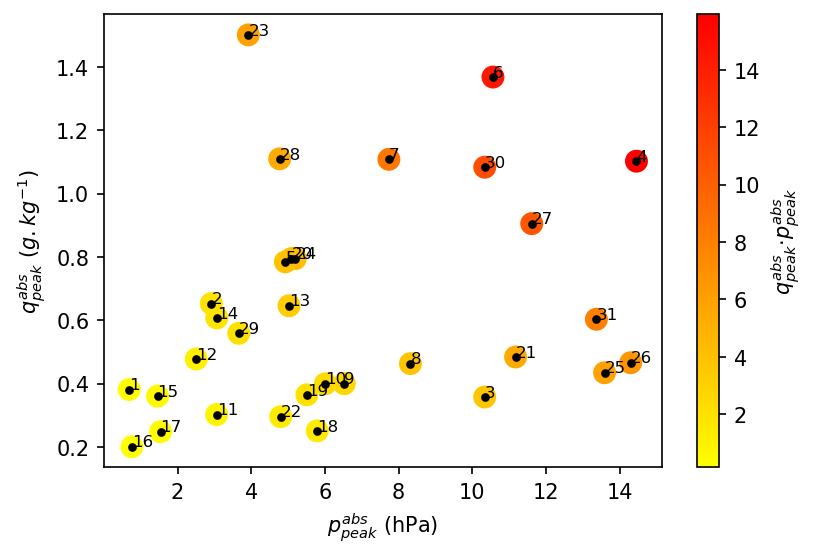

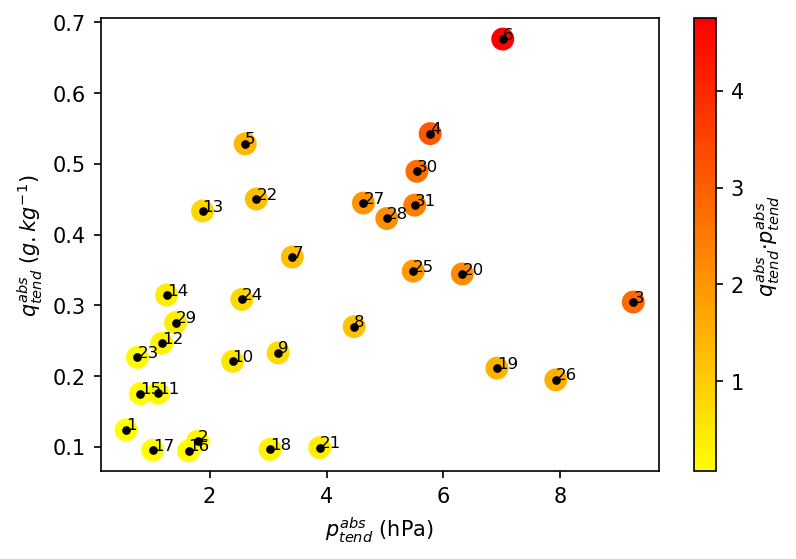

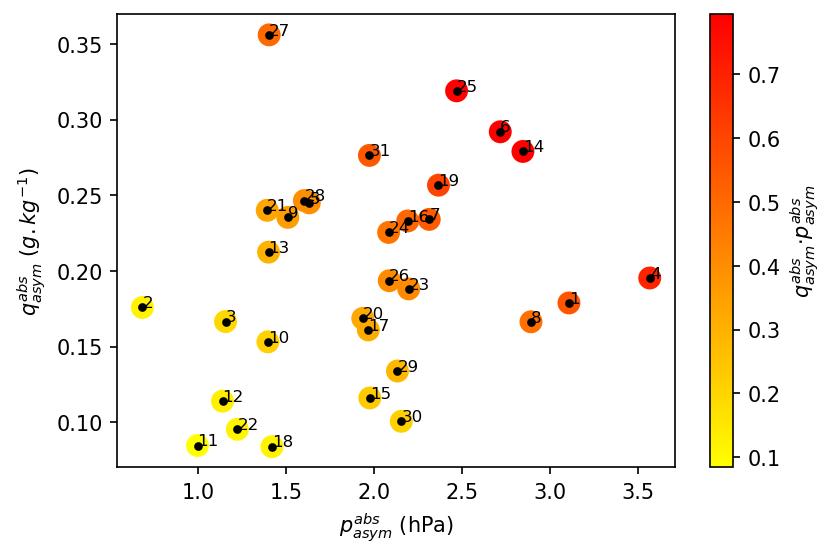

In [42]:
aae_and_bias(region=regions['w_canada'], save='False')

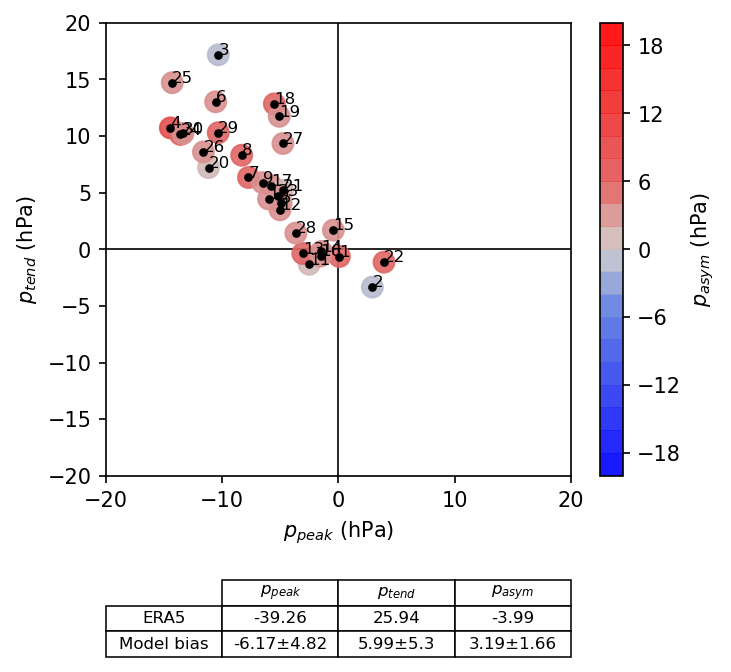

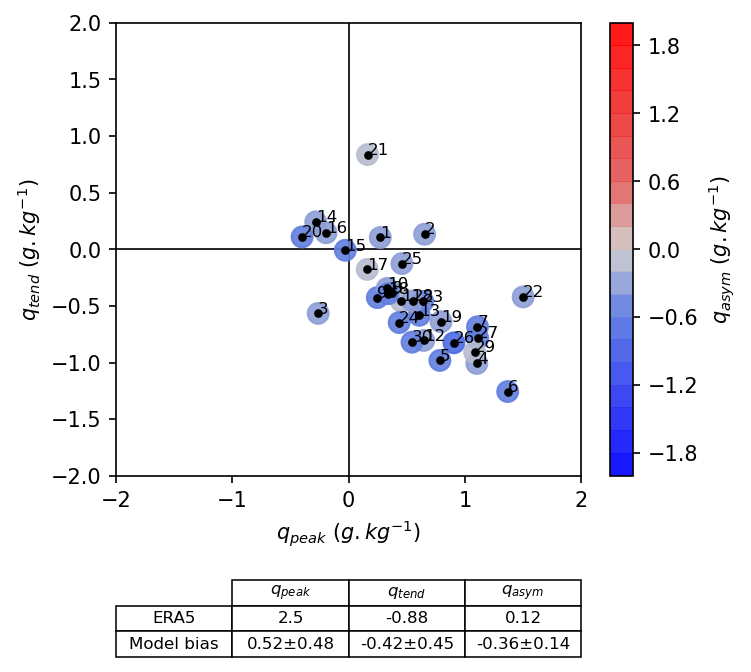

In [43]:
bias_monovariable(regions['w_canada'], plim=20, qlim=2, remove=['CRCM6-GEM5-UAA-SN', 'CRCM6-GEM5-UAA'])

## Eastern Canadian domain (Figure 12)

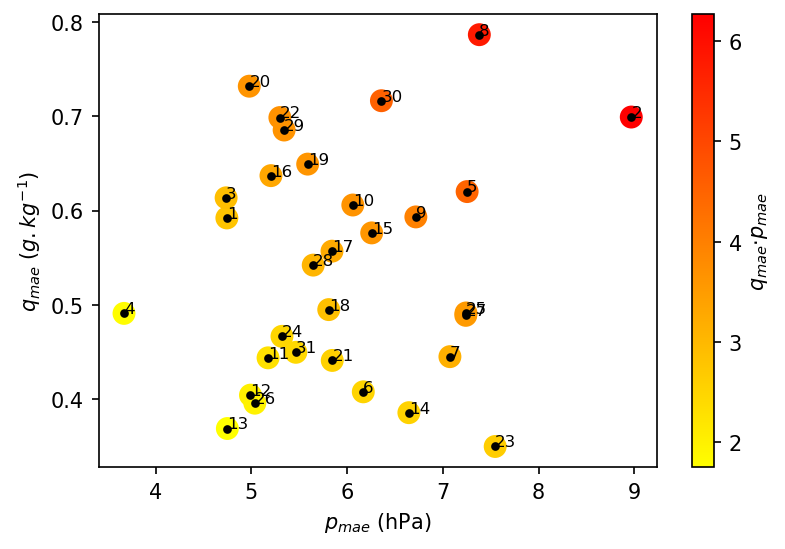

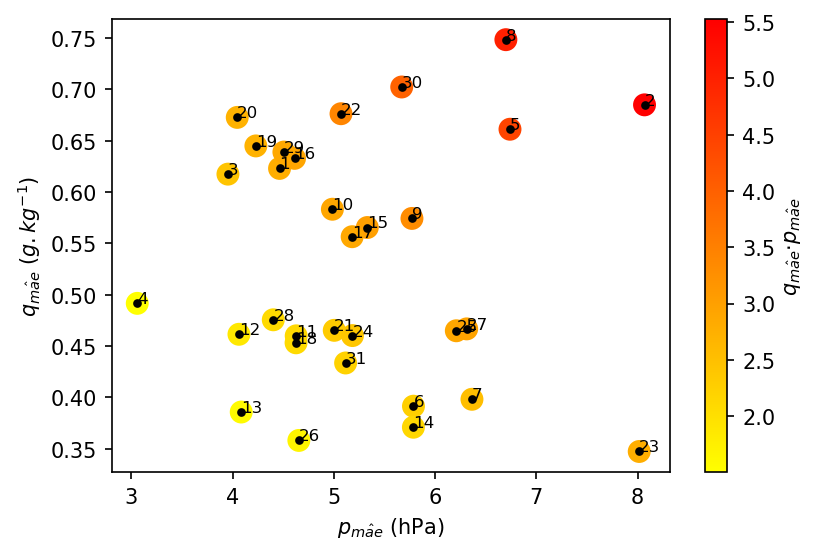

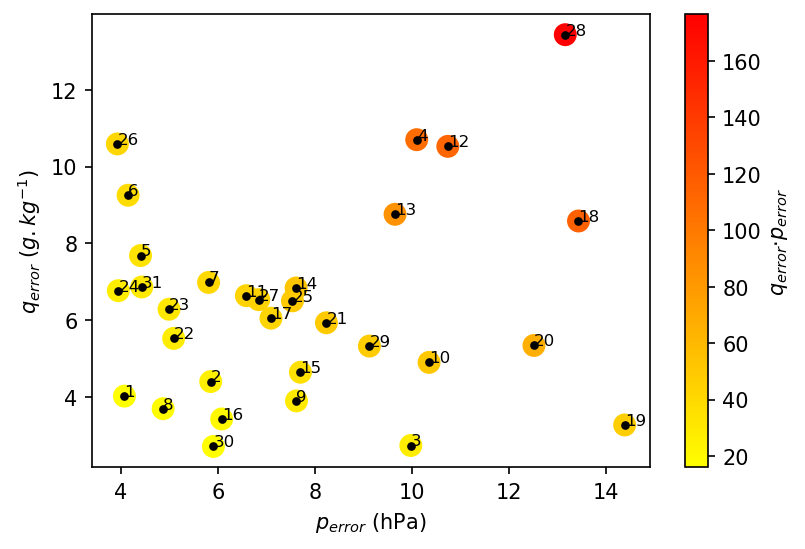

In [44]:
mae_and_fit(region=regions['e_canada'], save='False')

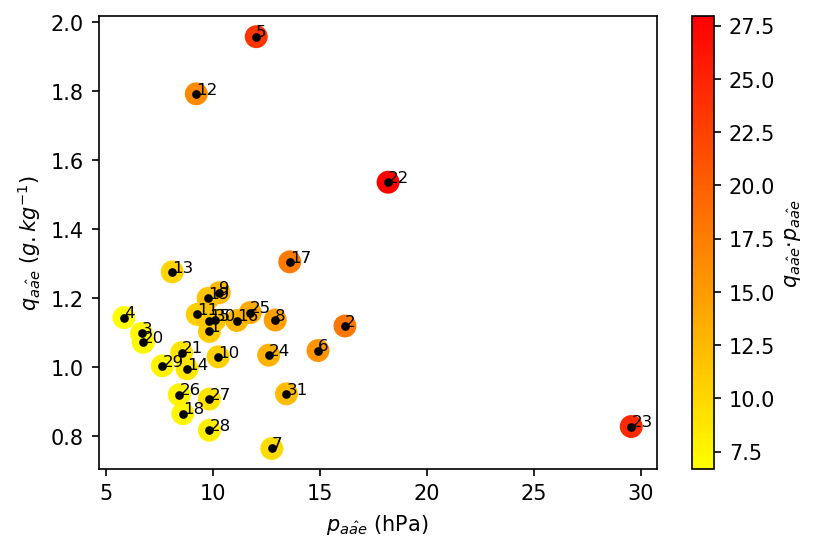

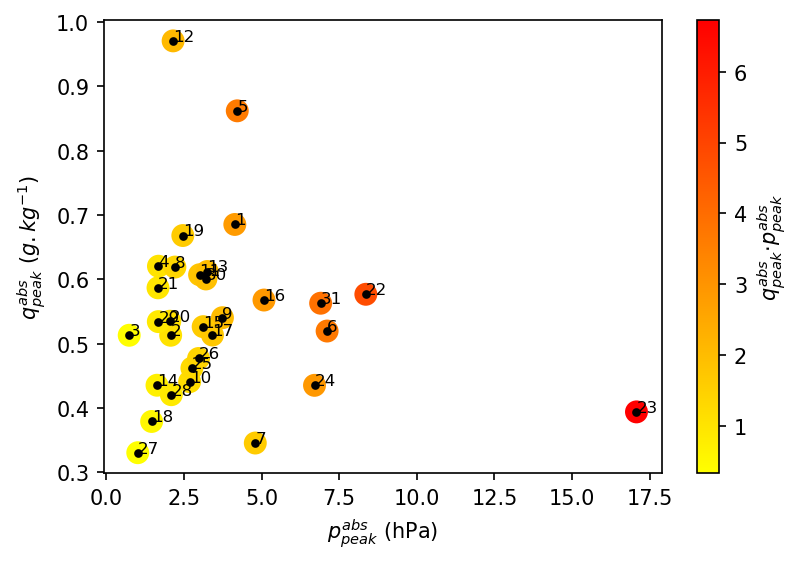

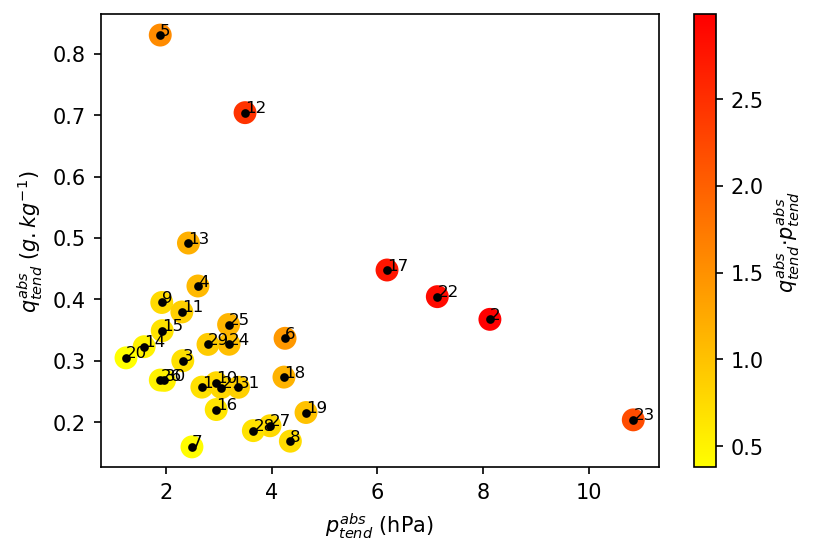

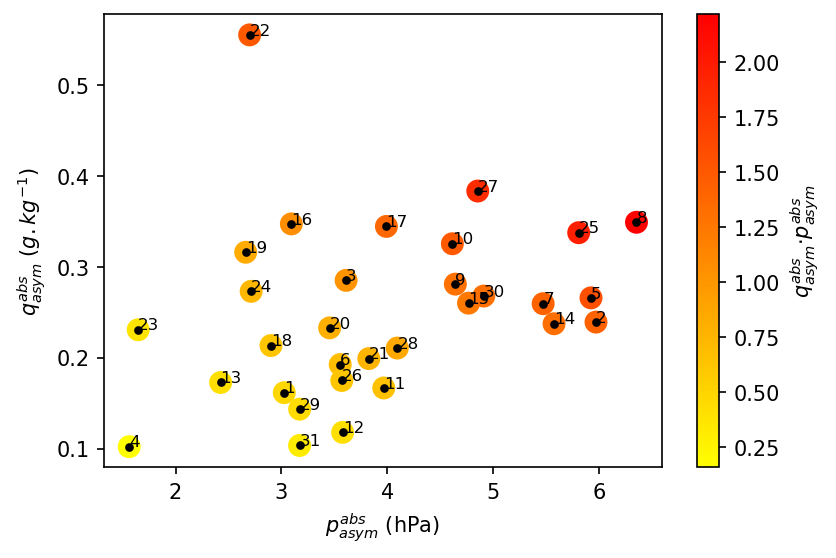

In [45]:
aae_and_bias(region=regions['e_canada'], save='False')

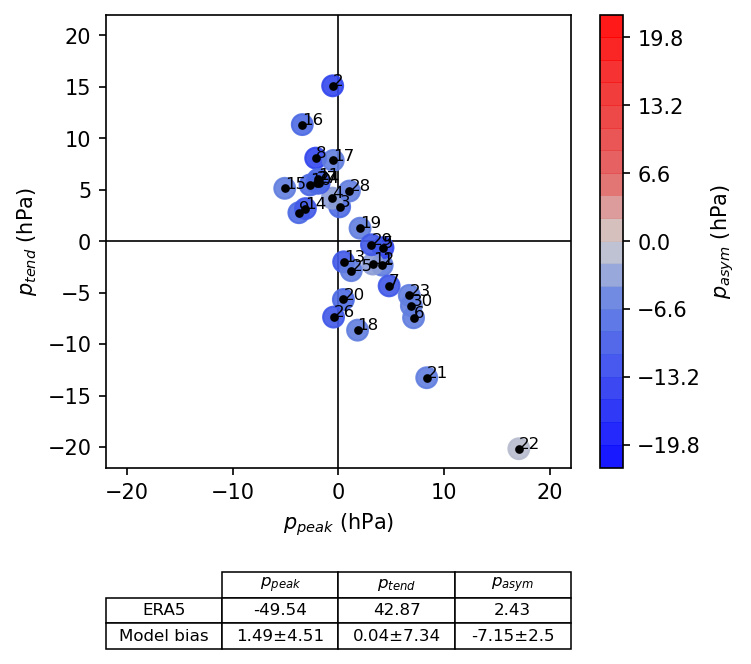

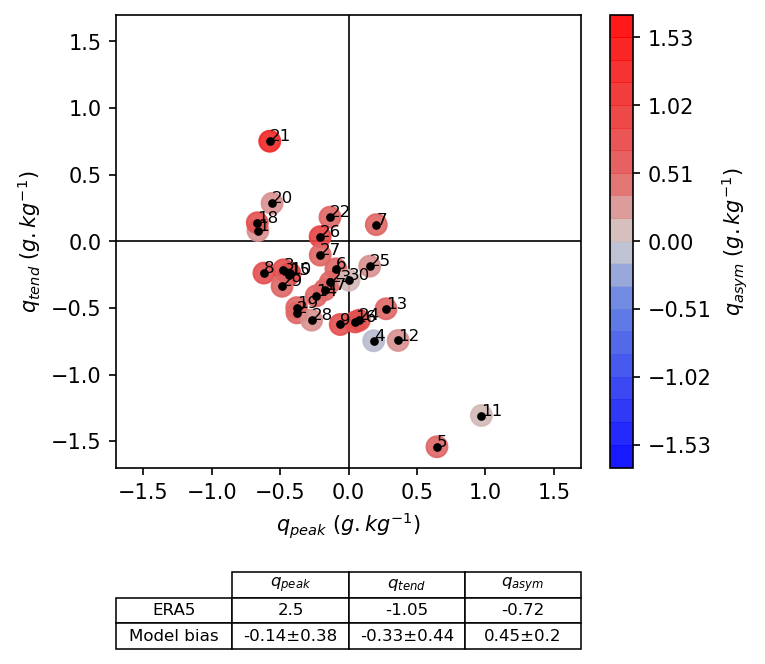

In [46]:
bias_monovariable(regions['e_canada'], plim=22, qlim=1.7, remove=['CRCM6-GEM5-UAA-SN', 'CRCM6-GEM5-UAA'])

## Texas (Figure 14)

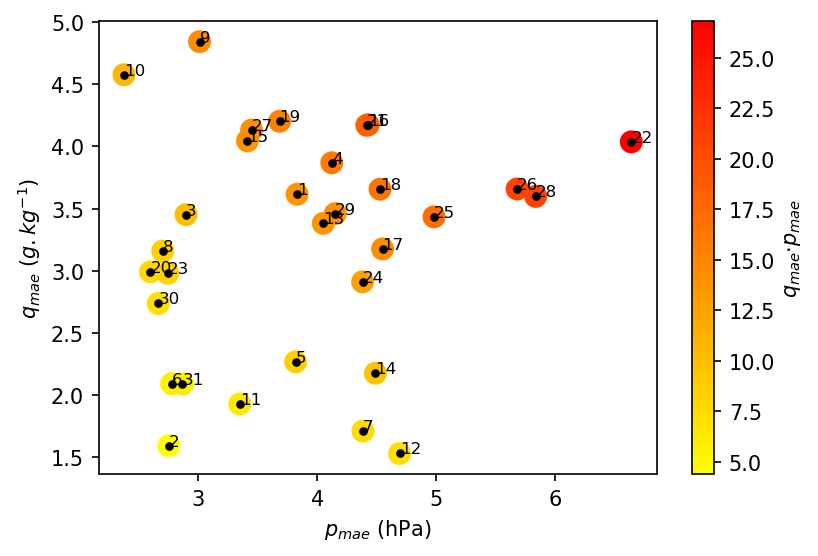

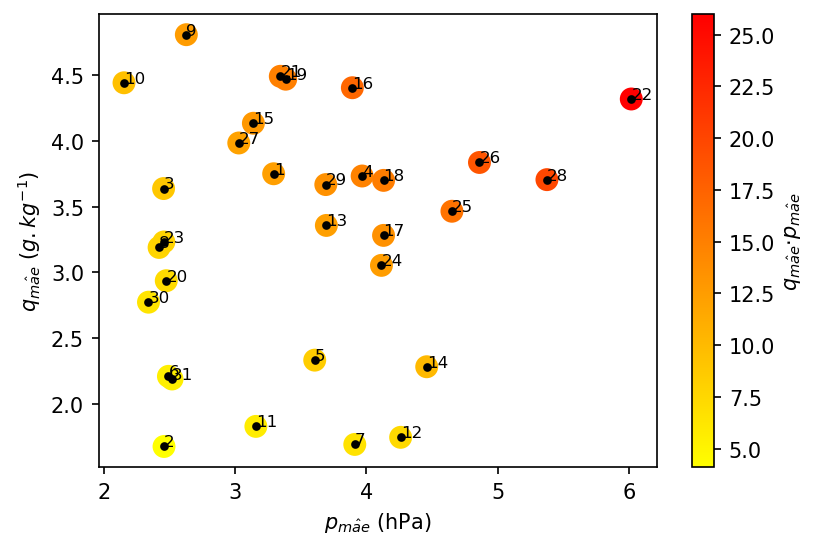

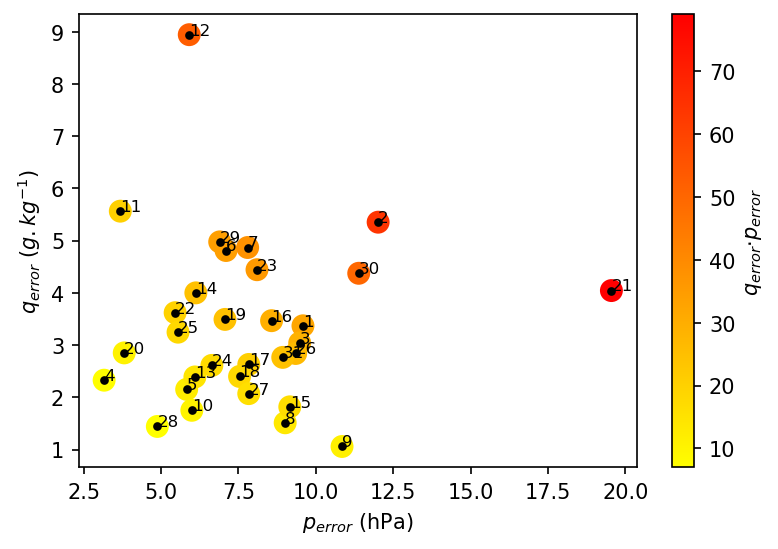

In [47]:
mae_and_fit(region=regions['gulf_mexico'], save='False')

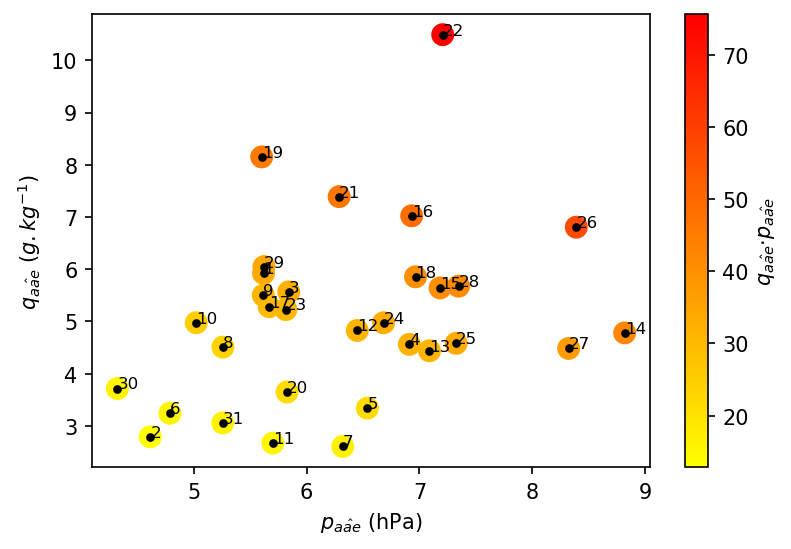

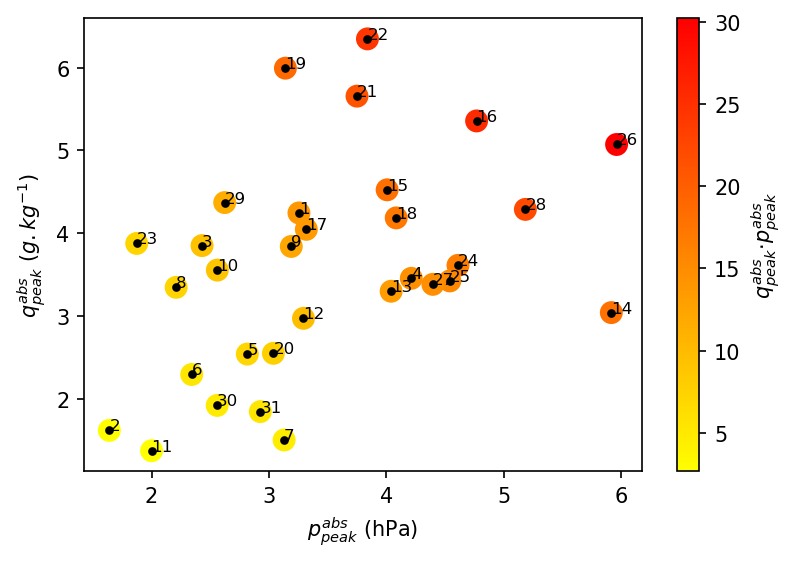

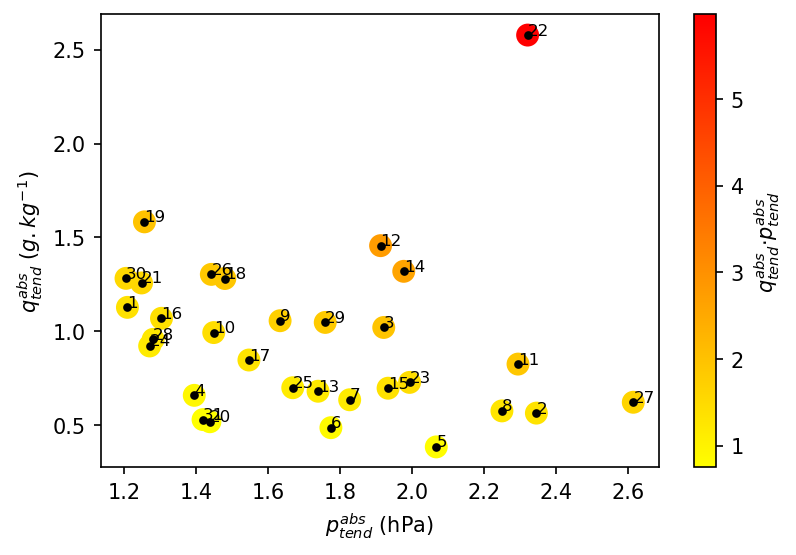

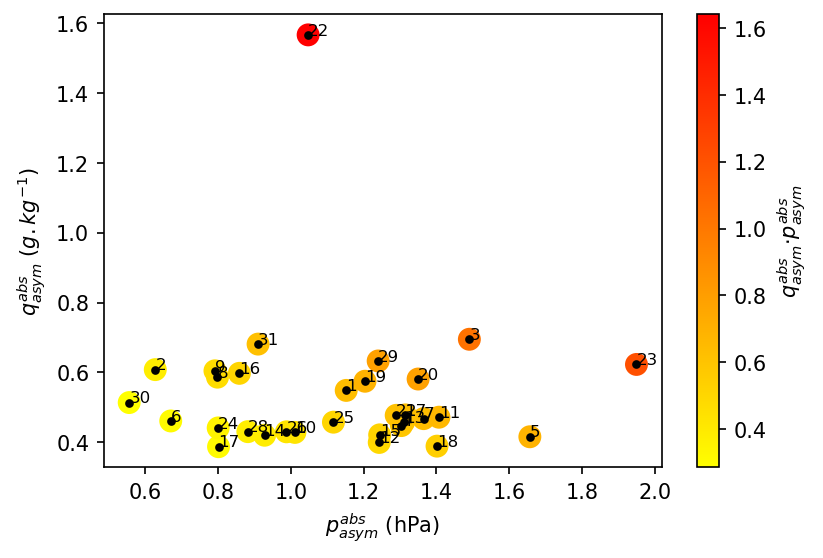

In [48]:
aae_and_bias(region=regions['gulf_mexico'], save='False')

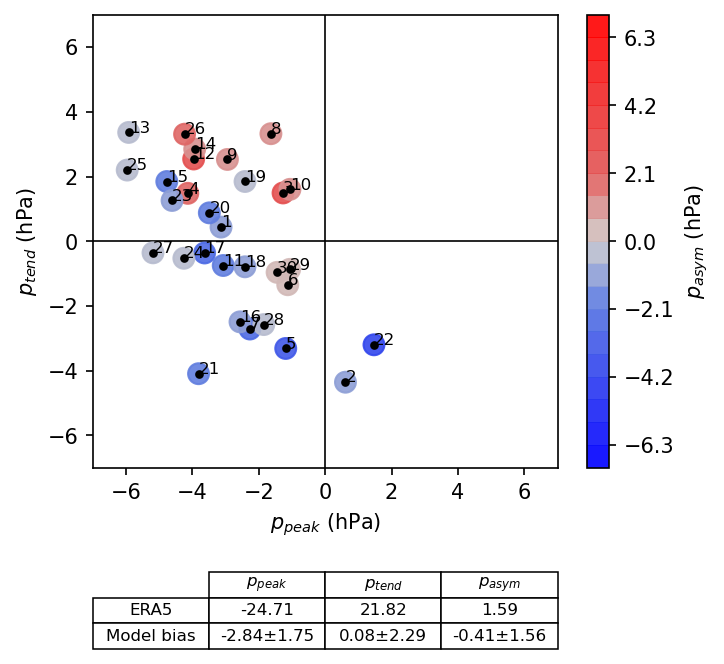

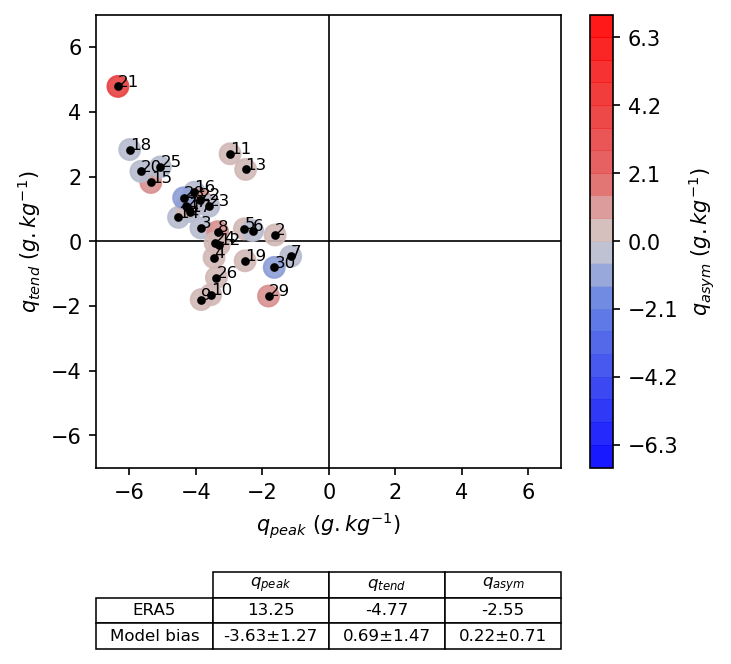

In [49]:
bias_monovariable(regions['gulf_mexico'], plim=7, qlim=7, remove=['CRCM6-GEM5-UAA-SN', 'CRCM6-GEM5-UAA'])

## Quebec (Figure 16)

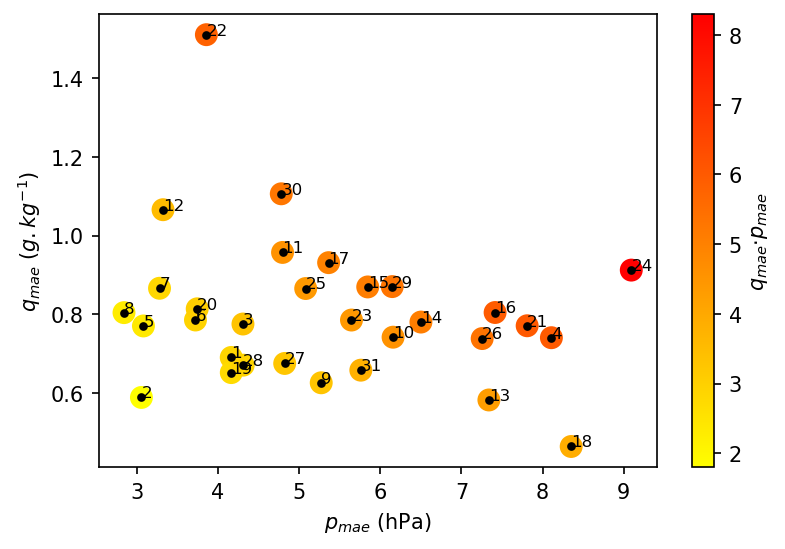

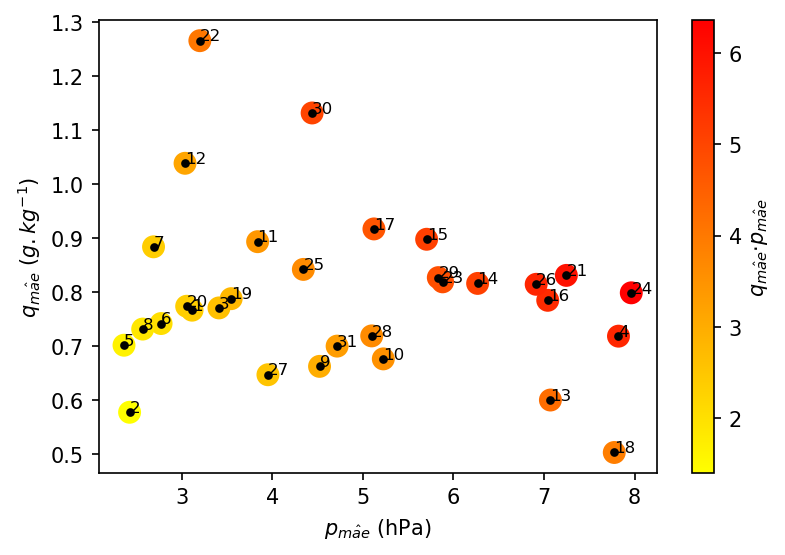

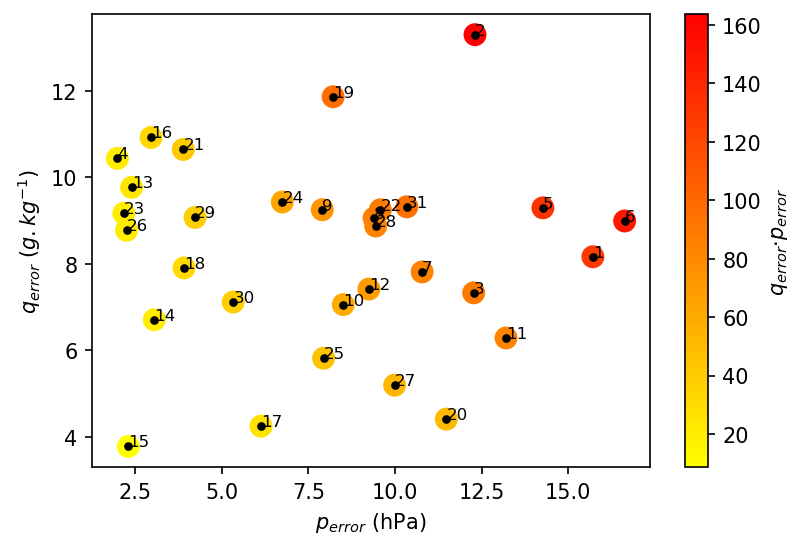

In [50]:
mae_and_fit(region=regions['quebec'], save='False')

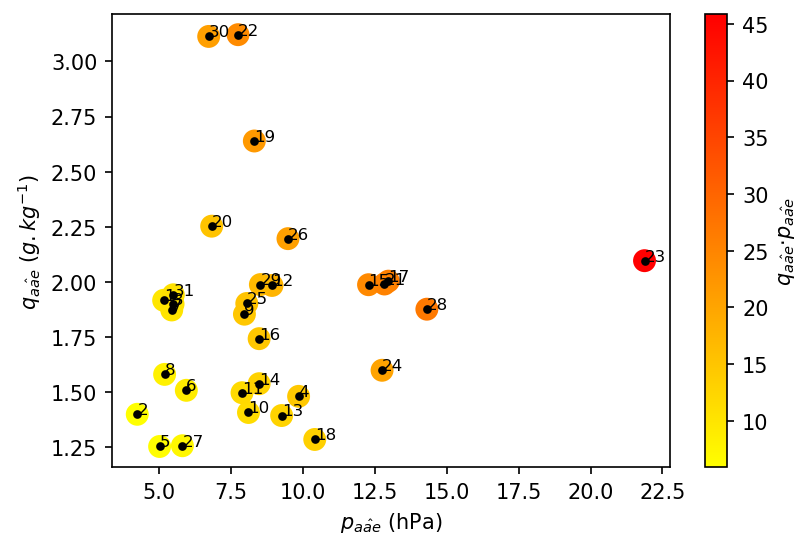

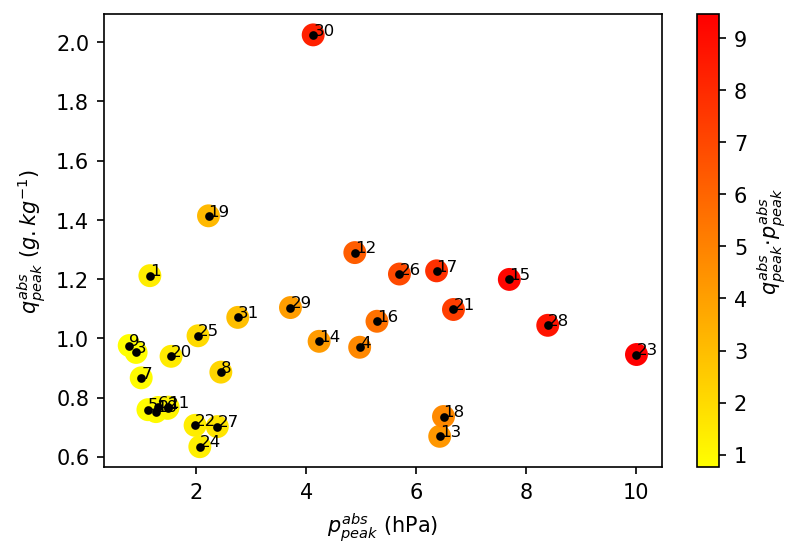

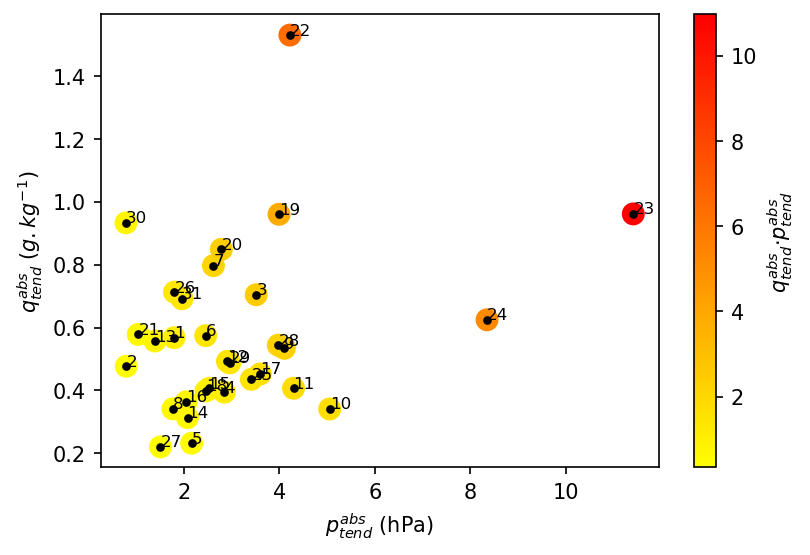

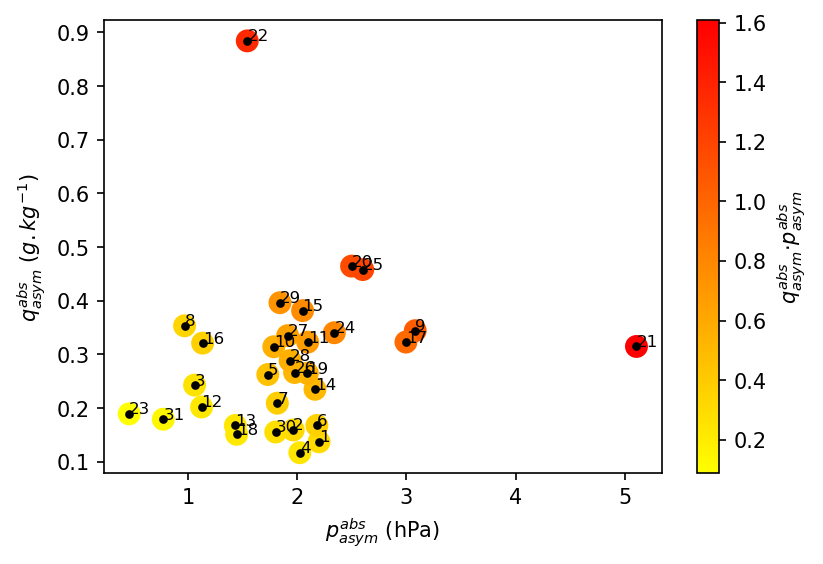

In [51]:
aae_and_bias(region=regions['quebec'], save='False')

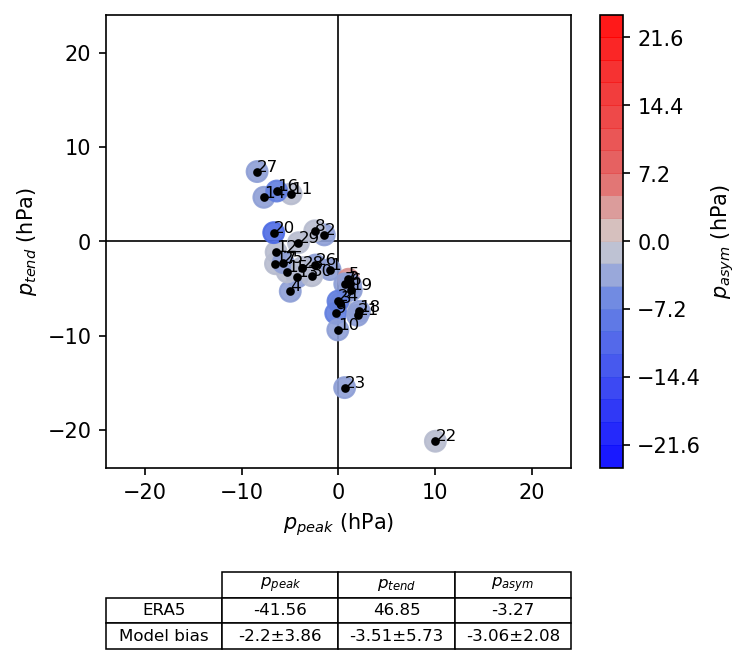

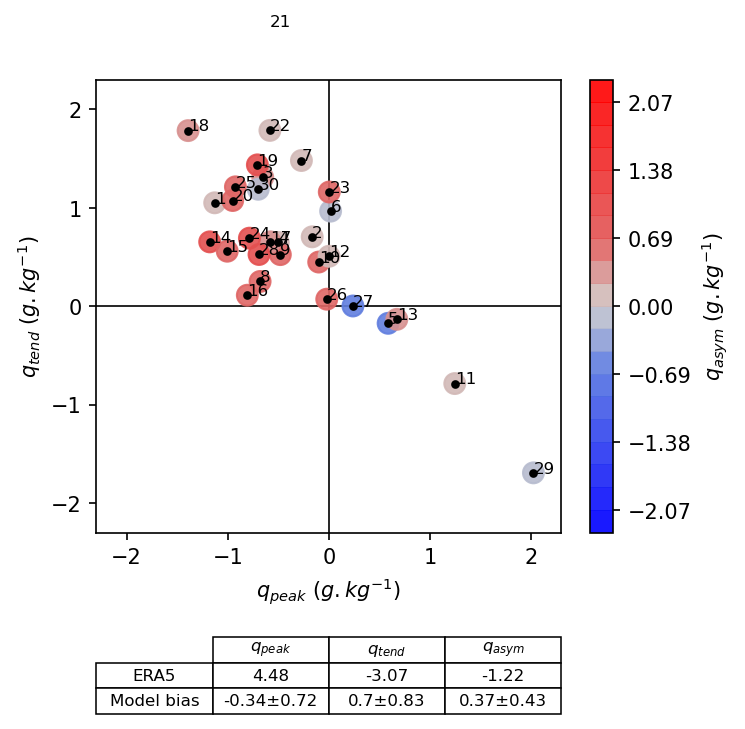

In [52]:
bias_monovariable(regions['quebec'], plim=24, qlim=2.3, remove=['CRCM6-GEM5-UAA-SN', 'CRCM6-GEM5-UAA'])